In [1]:
%matplotlib notebook

import numpy as np
import pylab as p
from scipy.integrate import odeint 

In [2]:
a = 1.
b = 0.5
c = 0.75
d = 0.25
def model(M,t=0):
    x,y  = M  
    dxdt = a*M[0] -   b*M[0]*M[1]
    dydt =  -c*M[1] + d*b*M[0]*M[1]
    return np.array([dxdt,dydt])


In [3]:
M = [10,5]
t  =  np.linspace(0,50,1000)
M_t = odeint(model,M,t)

<IPython.core.display.Javascript object>


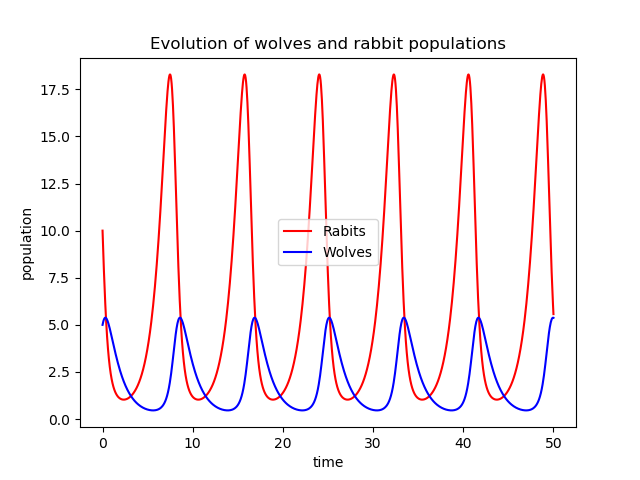

In [4]:
rabits, wolves  =  M_t.T
f1  = p.figure()
p.plot(t,rabits,'r-',label="Rabits")
p.plot(t,wolves,'b-',label="Wolves")
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of wolves and rabbit populations')
p.show()

<IPython.core.display.Javascript object>


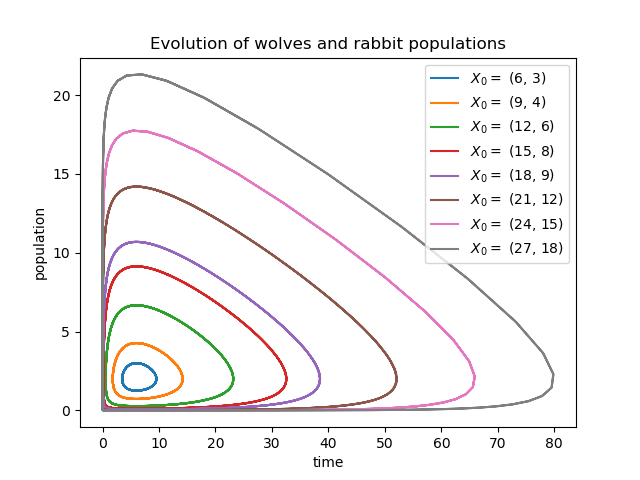

In [6]:
f2  = p.figure()
X = np.array([[6,3 ],[9,4],[12,6],[15,8],[18,9],[21,12],[24,15],[27,18]])
for i in range(len(X)):
    M_t = odeint(model,X[i],t)
    rabits,wolves =  M_t.T
    p.plot(rabits,wolves,label=rf"$X_0=$ ({X[i][0]}, {X[i][1]})")
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of wolves and rabbit populations')
p.show()